In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

In [3]:
df = pd.read_csv('WELFake_Dataset.csv', encoding='latin-1')

In [4]:
df

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMAâS ATTORNEY GENERAL SAYS ...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trumpâs comba...,0


In [5]:
df.drop(['Unnamed: 0','title'], axis = 1, inplace = True)

In [6]:
df.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [7]:
#handle null values 
df.isna().any()

text      True
label    False
dtype: bool

In [8]:
df.isna().sum()

text     39
label     0
dtype: int64

In [9]:
df.shape

(72134, 2)

In [10]:
df['text'].drop_duplicates(inplace = True)

In [11]:
df.shape

(72134, 2)

In [12]:
df

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,MEXICO CITY (Reuters) - Donald Trumpâs comba...,0


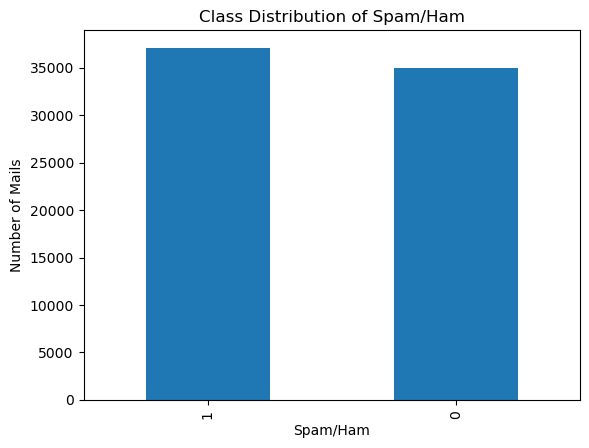

In [13]:
# Create a bar plot of the class distribution
class_counts = df['label'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [14]:
from collections import Counter
import re

import nltk
from nltk.corpus import stopwords

In [15]:
# Concatenate all tweet texts into a single string
# Convert the 'text' column to strings
df['text'] = df['text'].astype(str)
all_text = ' '.join(df['text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [16]:
# Split the text into individual words
words = all_text.split()

In [17]:
import nltk
from nltk.corpus import stopwords

# Download stopwords resource
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\DUNIYA
[nltk_data]     TRADER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [19]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('The', 211241),
 ('said', 153612),
 ('Trump', 152903),
 ('I', 119303),
 ('would', 103579),
 ('Mr.', 70338),
 ('people', 69432),
 ('one', 67944),
 ('also', 62418),
 ('U.S.', 56695),
 ('â\x80\x94', 56012),
 ('In', 53736),
 ('said.', 52448),
 ('Clinton', 51812),
 ('like', 50106),
 ('He', 49978),
 ('could', 48434),
 ('President', 47887),
 ('â\x80\x9d', 47052),
 ('It', 46091),
 ('But', 45599),
 ('United', 40923),
 ('Donald', 40775),
 ('two', 37842),
 ('Obama', 37836),
 ('told', 37182),
 ('even', 37076),
 ('new', 36917),
 ('government', 36874),
 ('last', 35692),
 ('Republican', 35632),
 ('many', 35357),
 ('-', 34998),
 ('first', 33913),
 ('A', 33871),
 ('American', 33432),
 ('Hillary', 33391),
 ('House', 32303),
 ('time', 31693),
 ('get', 31338),
 ('And', 30767),
 ('This', 30737),
 ('New', 30519),
 ('campaign', 30237),
 ('going', 30114),
 ('political', 29624),
 ('make', 29078),
 ('made', 28916),
 ('We', 28752),
 ('former', 28022),
 ('state', 27288),
 ('think', 26159),
 ('(', 25734),
 ('Whi

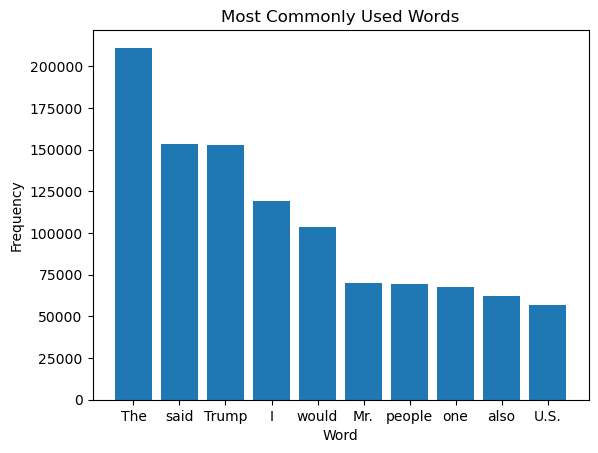

In [20]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

In [ ]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [21]:
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['text']).toarray()
y = df['label']

In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression()

In [24]:
clf.fit(X_train, y_train)

C:\Users\DUNIYA TRADER\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
#prediction
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)

In [26]:
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [27]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9555001039717197


In [28]:
#classification report 
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7089
           1       0.95      0.96      0.96      7338

    accuracy                           0.96     14427
   macro avg       0.96      0.96      0.96     14427
weighted avg       0.96      0.96      0.96     14427



In [29]:
#for decision tree
from sklearn.tree import DecisionTreeClassifier

In [30]:
clf = DecisionTreeClassifier()

In [31]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [32]:
y_pred = clf.predict(X_test)

In [33]:
y_pred

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [35]:
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_dt)

Accuracy: 0.9295764885284536


In [36]:
#for MNB
from sklearn.naive_bayes import MultinomialNB

In [37]:
clf = MultinomialNB()

In [38]:
clf.fit(X_train, y_train)

MultinomialNB()

In [39]:
y_pred = clf.predict(X_test)

In [40]:
y_pred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [41]:
accuracy_mnb = accuracy_score(y_test, y_pred)

In [42]:
print("Accuracy:", accuracy_mnb)

Accuracy: 0.8779372010813059


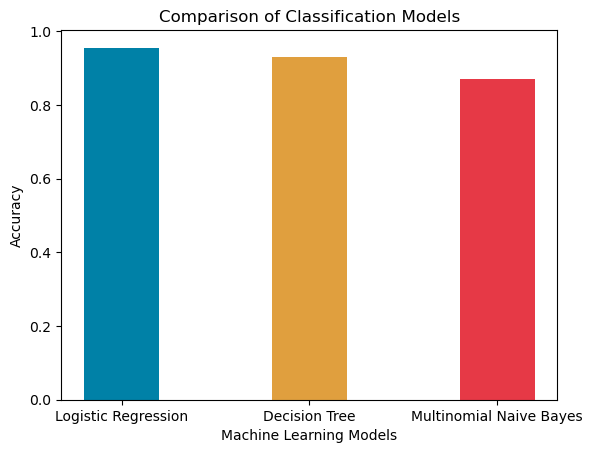

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Define model names and accuracy scores
models = ["Logistic Regression", "Decision Tree", "Multinomial Naive Bayes"]
accuracy_scores = [0.9555, 0.929, 0.87]

# Set the width of the bars
width = 0.4

# Set the positions of the bars
x = np.arange(len(models))

# Create a bar plot
plt.bar(x, accuracy_scores, width=width, color=["#0081a7", "#e09f3e", "#e63946"])

# Add labels and title
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Classification Models")

# Set the x-axis tick positions and labels
plt.xticks(x, models)

# Show the plot
plt.show()